In [40]:
import skimage
from skimage import io
import os
import matplotlib.pyplot as plt


filename = os.path.join('screenshots', 'MiniMetro1.png')
camera = io.imread(filename)

from skimage import filters

gray_camera = skimage.color.rgb2gray(camera)

val = 0.5
print(val)
mask = gray_camera > val

0.5


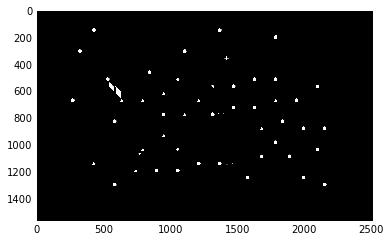

In [42]:
from skimage import measure
all_labels = measure.label(mask)

%matplotlib inline
plt.imshow(all_labels > 1, cmap='gray')


In [22]:
blobs_labels = measure.label(mask, background=0)
print(blobs_labels)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
